In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [30]:
romantic_df = pd.read_csv('data/romantic.csv')

In [31]:
romantic_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,1086.0
1,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.6,75.0
2,tt0000220,short,The Artist and the Flower Girl,The Artist and the Flower Girl,0,1901,\N,\N,"Romance,Short",NaN,NaN
3,tt0000225,short,Beauty and the Beast,La belle et la bête,0,1899,\N,\N,"Family,Fantasy,Romance",5.6,16.0
4,tt0000248,short,A Kiss in the Tunnel,The Kiss in the Tunnel,0,1899,\N,1,"Comedy,Romance,Short",6.0,1108.0


In [32]:
romantic_df.shape

(518979, 11)

In [33]:
romantic_df = romantic_df.dropna()

In [34]:
romantic_df.shape

(65991, 11)

In [47]:
romantic_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,1086.0
1,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.6,75.0
3,tt0000225,short,Beauty and the Beast,La belle et la bête,0,1899,\N,\N,"Family,Fantasy,Romance",5.6,16.0
4,tt0000248,short,A Kiss in the Tunnel,The Kiss in the Tunnel,0,1899,\N,1,"Comedy,Romance,Short",6.0,1108.0
5,tt0000363,short,Magical Sword,The Magic Sword,0,1901,\N,2,"Fantasy,Romance,Short",6.5,93.0


In [40]:
romantic_df.describe()

,isAdult,averageRating,numVotes
count,65991.000000,65991.000000,6.599100e+04
mean,0.012926,6.828427,1.652291e+03
std,0.112956,1.409686,1.662185e+04
min,0.000000,1.000000,5.000000e+00
25%,0.000000,6.000000,1.100000e+01
50%,0.000000,7.000000,3.900000e+01
75%,0.000000,7.800000,2.060000e+02
max,1.000000,10.000000,1.570296e+06


In [207]:
test = romantic_df[romantic_df.runtimeMinutes != '\\N']

In [208]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51389 entries, 0 to 516732
Data columns (total 11 columns):
tconst            51389 non-null object
titleType         51389 non-null object
primaryTitle      51389 non-null object
originalTitle     51389 non-null object
isAdult           51389 non-null int64
startYear         51389 non-null object
endYear           51389 non-null object
runtimeMinutes    51389 non-null object
genres            51389 non-null object
averageRating     51389 non-null float64
numVotes          51389 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 4.7+ MB


In [209]:
test = test[test['numVotes'] > 50000]
test.shape

(437, 11)

In [210]:
test = test[test['averageRating'] > 8.1]
test.shape

(23, 11)

In [211]:
test = test[test['titleType'] != 'tvEpisode']
test.shape

(23, 11)

In [212]:
test.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
104759,tt1305806,movie,The Secret in Their Eyes,El secreto de sus ojos,0,2009,\N,129,"Drama,Mystery,Romance",8.2,169724.0
116065,tt1442437,tvSeries,Modern Family,Modern Family,0,2009,\N,22,"Comedy,Romance",8.4,305963.0
131228,tt1606375,tvSeries,Downton Abbey,Downton Abbey,0,2010,2015,58,"Drama,Romance",8.7,139036.0
197717,tt3006802,tvSeries,Outlander,Outlander,0,2014,\N,64,"Drama,Fantasy,Romance",8.5,88704.0
278522,tt5555260,tvSeries,This Is Us,This Is Us,0,2016,\N,45,"Comedy,Drama,Romance",8.7,71586.0


In [213]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

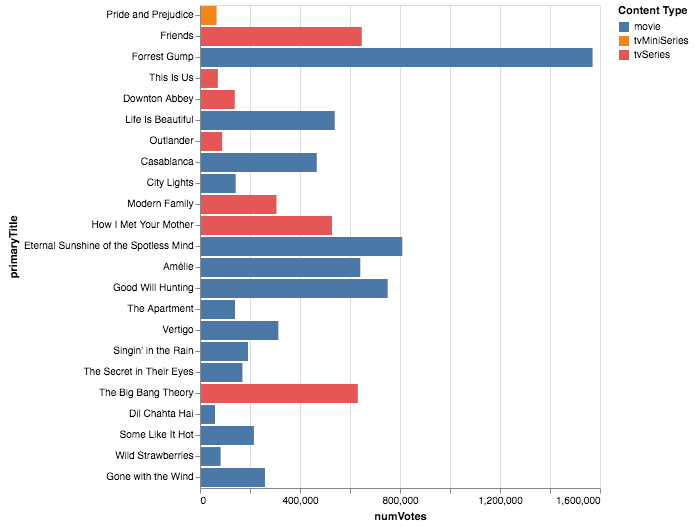

In [277]:
bars = alt.Chart(test).mark_bar().encode(
    x=alt.X('numVotes:Q'),
    y=alt.Y('primaryTitle:N',         
            sort = alt.EncodingSortField(
                field="averageRating",
                op="sum",
                order="descending")),
    color=alt.Color('titleType:N', legend=alt.Legend(title="Content Type")),
    tooltip=['titleType','numVotes', 'averageRating'],).interactive()
bars

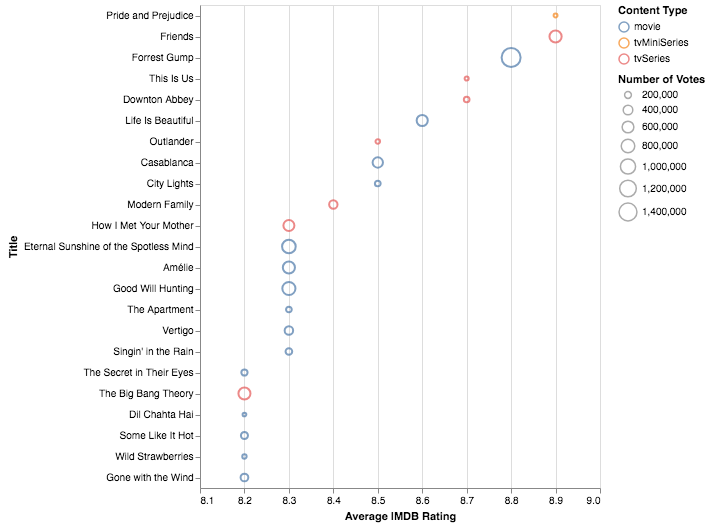

In [271]:
chart = alt.Chart(test).mark_point().encode(
    size=alt.Size('numVotes:Q', legend=alt.Legend(title="Number of Votes")),
    x=alt.X('averageRating:Q',  scale=alt.Scale(domain=(8.1, 9)), axis=alt.Axis(title='Average IMDB Rating')),
    y=alt.Y('primaryTitle:N', axis=alt.Axis(title='Title'),        
            sort = alt.EncodingSortField(
                field="averageRating",
                op="sum",
                order="descending")),
    color=alt.Color('titleType:N', legend=alt.Legend(title="Content Type")),
    tooltip=['primaryTitle', 'titleType','numVotes', 'runtimeMinutes', 'averageRating']).interactive()

alt.themes.enable('opaque')
chart

In [274]:
chart.save('chart_hi.png', scale_factor=5.0)

/Users/sarthak/Documents/IMDB/env/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


In [278]:
bars.save('bars_hi.png', scale_factor=5.0)